### Assignment 1

Submission should be in a Jupyter notebook (.ipynb)

1. Implement a function that converts a ```fixed<w, b>``` representation to a real number. Use two's compement for negative numbers. The function signature is 

   ```python
   def fromFixedPoint(w: int, b:int, bits:[int]) -> float:
   # w: width of the binary representation
   # b: binary point
   ```
   Test the following inputs
   ```python
   fromFixedPoint(10, 3, [0, 1, 0, 1, 1, 0, 0, 1, 1, 0])
   ```
   ```python
   fromFixedPoint(10, 5, [1, 0, 0, 1, 0, 1, 0, 1, 1, 1])
   ```
   ```python
   fromFixedPoint(8, 2, [1, 0, 1, 0, 1, 0, 1, 1])
   ```
   


In [1]:
def fromFixedPoint(w: int, b: int, bits: [int]) -> float:
    # Step 1: Check if the number is negative (MSB is 1)
    if bits[0] == 1:
        # Step 2: Convert to two's complement for negative numbers
        # Invert all bits
        inverted_bits = [1 - bit for bit in bits]
        # Add 1 to the least significant bit (LSB)
        carry = 1
        for i in range(w - 1, -1, -1):
            if inverted_bits[i] == 0:
                inverted_bits[i] = 1
                carry = 0
                break
            else:
                inverted_bits[i] = 0
        # Convert the inverted bits to a decimal value
        decimal_value = -sum([inverted_bits[i] * (2 ** (w - 1 - i)) for i in range(w)])
    else:
        # Step 3: Convert to decimal for positive numbers
        decimal_value = sum([bits[i] * (2 ** (w - 1 - i)) for i in range(w)])
    
    # Step 4: Adjust for the binary point
    real_number = decimal_value / (2 ** b)
    return real_number

# Test cases
print(fromFixedPoint(10, 3, [0, 1, 0, 1, 1, 0, 0, 1, 1, 0]))  # Expected: 44.75
print(fromFixedPoint(10, 5, [1, 0, 0, 1, 0, 1, 0, 1, 1, 1]))  # Expected: -13.28125
print(fromFixedPoint(8, 2, [1, 0, 1, 0, 1, 0, 1, 1]))         # Expected: -21.25

44.75
-13.28125
-21.25


2. Calculate the price of the following questions step by step using two step Cox Rox Rubinstein (CRR) Binomial tree

    a. European call option with $S = 100$, $K = 105$, $r = 3\%$, $T=1$, $\sigma = 20\%$
    
    b. European put option with $S = 100$, $K = 105$, $r = 3\%$, $T=1$, $\sigma = 20\%$
    
    c. European call option with $S = 100$, $K = 105$, $r = 3\%$, $T=1$, $\sigma = 10\%$
    
    d. European put option with $S = 100$, $K = 105$, $r = 3\%$, $T=1$, $\sigma = 10\%$
    
    What is the value of the portfolio that is long (a) and short (b)? How about the portfolio that long (c) and short (d)? 

    Note: Don't use codes to generate numbers. Calculate them manually.
    

**(a)**<br>
$t = \frac{T}{n} = 0.5$<br>
$b = e^{rt + \sigma^2t + e^{-rt}} = 2.021$ (3 d.p.)<br>
$u = \frac{b+\sqrt{b^2-4}}{2} = 1.155$ (3 d.p.)<br>
$p = \frac{e^{rt}-\frac{1}{u}}{u-\frac{1}{u}} = 0.516$ (3 d.p.)<br>
$C_{2,2} = \max(Su^2 - K, 0) = 28.339$ (3 d.p.)<br>
$C_{2,1} = \max(S - K, 0) = 0$<br>
$C_{2,0} = \max(Su^{-2} - K, 0) = 0$<br>
$C_{1,1} = (pC_{2,2} + (1-p)C_{2,1})e^{-rt} = 14.417$ (3 d.p.)<br>
$C_{1,0} = (pC_{2,1} + (1-p)C_{2,0})e^{-rt} = 0$<br>
$C_{0} = (pC_{1,1} + (1-p)C_{1,0})e^{-rt} = 7.335$ (3 d.p.)<br>

**(b)**<br>
$t = \frac{T}{n} = 0.5$<br>
$b = e^{rt + \sigma^2t + e^{-rt}} = 2.021$ (3 d.p.)<br>
$u = \frac{b+\sqrt{b^2-4}}{2} = 1.155$ (3 d.p.)<br>
$p = \frac{e^{rt}-\frac{1}{u}}{u-\frac{1}{u}} = 0.516$ (3 d.p.)<br>
$P_{2,2} = \max(Su^2 - K, 0) = 0$<br>
$P_{2,1} = \max(S - K, 0) = 5$<br>
$P_{2,0} = \max(Su^{-2} - K, 0) = 30.003$ (3 d.p.)<br>
$P_{1,1} = (pP_{2,2} + (1-p)P_{2,1})e^{-rt} = 2.382$ (3 d.p.)<br>
$P_{1,0} = (pP_{2,1} + (1-p)P_{2,0})e^{-rt} = 16.836$ (3 d.p.)<br>
$P_{0} = (pP_{1,1} + (1-p)P_{1,0})e^{-rt} = 9.232$ (3 d.p.)<br>

**(c)**<br>
$t = \frac{T}{n} = 0.5$<br>
$b = e^{rt + \sigma^2t + e^{-rt}} = 2.021$ (3 d.p.)<br>
$u = \frac{b+\sqrt{b^2-4}}{2} = 1.155$ (3 d.p.)<br>
$p = \frac{e^{rt}-\frac{1}{u}}{u-\frac{1}{u}} = 0.516$ (3 d.p.)<br>
$C_{2,2} = \max(Su^2 - K, 0) = 10.691$ (3 d.p.)<br>
$C_{2,1} = \max(S - K, 0) = 0$<br>
$C_{2,0} = \max(Su^{-2} - K, 0) = 0$
$C_{1,1} = (pC_{2,2} + (1-p)C_{2,1})e^{-rt} = 6.165$ (3 d.p.)<br>
$C_{1,0} = (pC_{2,1} + (1-p)C_{2,0})e^{-rt} = 0$<br>
$C_{0} = (pC_{1,1} + (1-p)C_{1,0})e^{-rt} = 3.555$ (3 d.p.)<br>

**(d)**<br>
$t = \frac{T}{n} = 0.5$<br>
$b = e^{rt + \sigma^2t + e^{-rt}} = 2.021$ (3 d.p.)<br>
$u = \frac{b+\sqrt{b^2-4}}{2} = 1.155$ (3 d.p.)<br>
$p = \frac{e^{rt}-\frac{1}{u}}{u-\frac{1}{u}} = 0.516$ (3 d.p.)<br>
$P_{2,2} = \max(Su^2 - K, 0) = 0$<br>
$P_{2,1} = \max(S - K, 0) = 5$<br>
$P_{2,0} = \max(Su^{-2} - K, 0) = 18.563$ (3 d.p.)<br>
$P_{1,1} = (pP_{2,2} + (1-p)P_{2,1})e^{-rt} = 2.042$ (3 d.p.)<br>
$P_{1,0} = (pP_{2,1} + (1-p)P_{2,0})e^{-rt} = 10.465$ (3 d.p.)<br>
$P_{0} = (pP_{1,1} + (1-p)P_{1,0})e^{-rt} = 5.452$ (3 d.p.)

3. Greeks measure the sensitivity of the price of derivatives to a change in underlying asset’s parameters. They are used for hedging and risk
management. The commonly used greeks are:
    * Delta $\Delta = \frac{\partial V}{\partial S}$: measures the rate of change of the option value with respect to changes in the underlying asset's price.
    * Gamma $\Gamma = \frac{\partial^2 V}{\partial S^2} = \frac{\partial \Delta}{\partial S}$: measures the rate of change of delta with respect to changes in the underlying asset's price.
    * Vega: $v = \frac{\partial V}{\partial \sigma}$: measures the rate of change of the option value with respect to changes in the underlying asset's volatility.
    * Theta: $\theta = \frac{\partial V}{\partial t}$: the rate of change in the price of an option with respect to pricing time. Note that we normally use $t$ to represent pricing time, $T$ to represent expiry time, time to expiry in our pricer is $T-t$. In the implementation of the pricers that take time to expiry as an argument, we implicitly set pricing time to 0 (present).
    * Rho: the rate of change in the price of an option in response to a change in the interest rate.
    
  The greeks are normally not known in closed form since numerical pricers are used. They are approximated by finite differences:

  \begin{align}
    & \Delta = \frac{\partial V}{\partial S} \approx \frac{V(S + \Delta S) - V(S-\Delta S)}{2 \Delta S}, ~~~\Delta S = 0.1\% S \\
    & \Gamma = \frac{\partial V^2}{\partial S^2} \approx \frac{V(S + \Delta S) - 2V(S) + V(S-\Delta S)}{\Delta S^2} , ~~~ choose ~~~ \Delta S ~~~ appropriately!\\
    & v = \frac{\partial V}{\partial \sigma} \approx \frac{V(S, \sigma +\Delta \sigma) - V(S, \sigma -\Delta \sigma)}{2 \Delta \sigma } ~~~~~~~\Delta \sigma = 0.1\% \\
    & \theta = \frac{\partial V}{\partial t} \approx \frac{V(S, t+\Delta t, T) - V(S, t, T)}{\Delta t} ~~~~\Delta t = 0.004 \\
    & \rho = \frac{\partial V}{\partial r} \approx \frac{V(S, r+\Delta r) - V(S, r - \Delta r)}{2 \Delta r}  ~~~~~\Delta r = 0.0001
  \end{align}

  Implement a Greeks calculator for binomial tree pricer provided below. The signature of the greeks calculator is
      ```python
      def binomialGreeks(S, r, vol, T, strike, greekType) -> float
      ```
  Setting $S = 100, r = 0.03, vol = 0.2, t = 0, T = 1$, plot each greeks as a function of strike from 50 to 150. Play with different binomial models and see if there is any difference.
  
  Note that in practice, the greeks are rescaled with a pre-defined scaler, so that they give a sense of how much PV (Delta) changes with a typical move of the market. The rescaling is not incorporated in this exercise.

  Please only show one graph for each Greek for European and American put option.  Total 12 graphs : (price, delta, gamma, vega, theta, rho) *(European, American Put Option).

In [2]:
# binomial pricer for exercise 3
import math
from enum import Enum

class PayoffType(Enum):
    Call = 0
    Put = 1
    
class EuropeanOption():
    def __init__(self, expiry, strike, payoffType):
        self.expiry = expiry
        self.strike = strike
        self.payoffType = payoffType
    def payoff(self, S):
        if self.payoffType == PayoffType.Call:
            return max(S - self.strike, 0)
        elif self.payoffType == PayoffType.Put:
            return max(self.strike - S, 0)
        else:
            raise Exception("payoffType not supported: ", self.payoffType)
    def valueAtNode(self, t, S, continuation):
        return continuation

class AmericanOption():
    def __init__(self, expiry, strike, payoffType):
        self.expiry = expiry
        self.strike = strike
        self.payoffType = payoffType
    def payoff(self, S):
        if self.payoffType == PayoffType.Call:
            return max(S - self.strike, 0)
        elif self.payoffType == PayoffType.Put:
            return max(self.strike - S, 0)
        else:
            raise Exception("payoffType not supported: ", self.payoffType)
    def valueAtNode(self, t, S, continuation):
        return max(self.payoff(S), continuation)

def crrCalib(r, vol, t):
    b = math.exp(vol * vol * t + r * t) + math.exp(-r * t)
    u = (b + math.sqrt(b * b - 4)) / 2
    p = (math.exp(r * t) - (1 / u)) / (u - 1 / u)
    return (u, 1/u, p)

def jrrnCalib(r, vol, t):
    u = math.exp((r - vol * vol / 2) * t + vol * math.sqrt(t))
    d = math.exp((r - vol * vol / 2) * t - vol * math.sqrt(t))
    p = (math.exp(r * t) - d) / (u - d)
    return (u, d, p)

def jreqCalib(r, vol, t):
    u = math.exp((r - vol * vol / 2) * t + vol * math.sqrt(t))
    d = math.exp((r - vol * vol / 2) * t - vol * math.sqrt(t))
    return (u, d, 1/2)

def tianCalib(r, vol, t):
    v = math.exp(vol * vol * t)
    u = 0.5 * math.exp(r * t) * v * (v + 1 + math.sqrt(v*v + 2*v - 3))
    d = 0.5 * math.exp(r * t) * v * (v + 1 - math.sqrt(v*v + 2*v - 3))
    p = (math.exp(r * t) - d) / (u - d)
    return (u, d, p)

def binomialPricer(S, r, vol, trade, n, calib):
    t = trade.expiry / n
    (u, d, p) = calib(r, vol, t)
    # set up the last time slice, there are n+1 nodes at the last time slice
    vs = [trade.payoff(S * u ** (n - i) * d ** i) for i in range(n + 1)]
    # iterate backward
    for i in range(n - 1, -1, -1):
        # calculate the value of each node at time slide i, there are i nodes
        for j in range(i + 1):
            nodeS = S * u ** (i - j) * d ** j
            continuation = math.exp(-r * t) * (vs[j] * p + vs[j + 1] * (1 - p))
            vs[j] = trade.valueAtNode(t * i, nodeS, continuation)
    return vs[0]

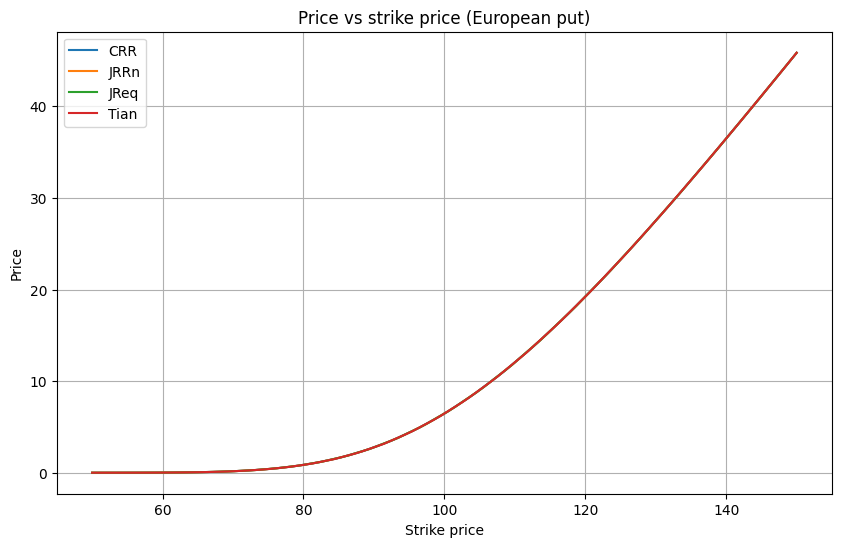

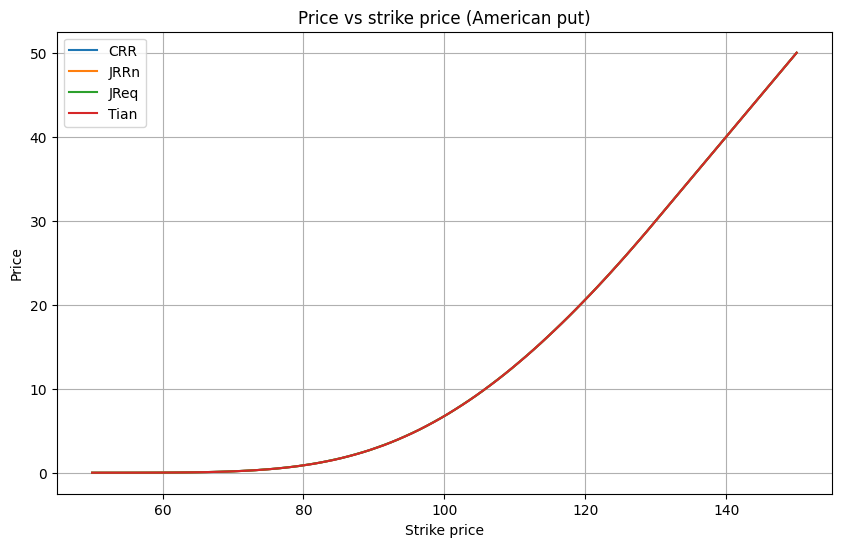

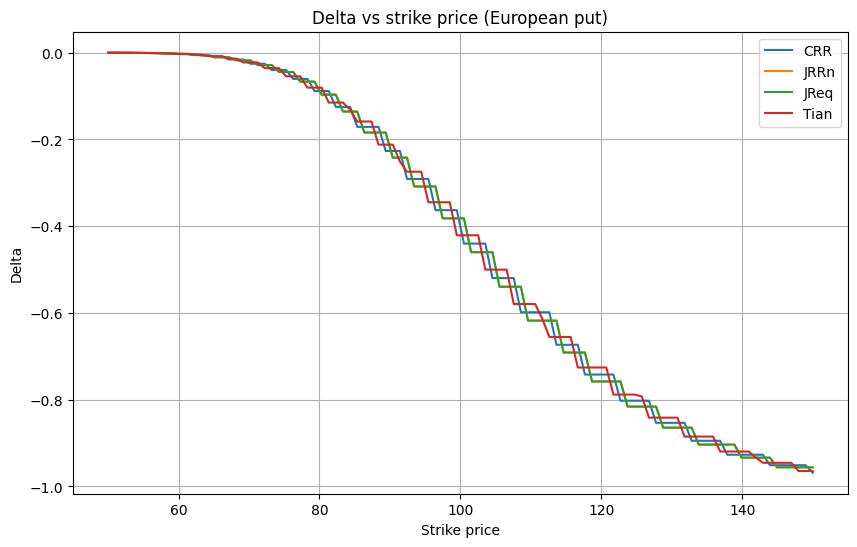

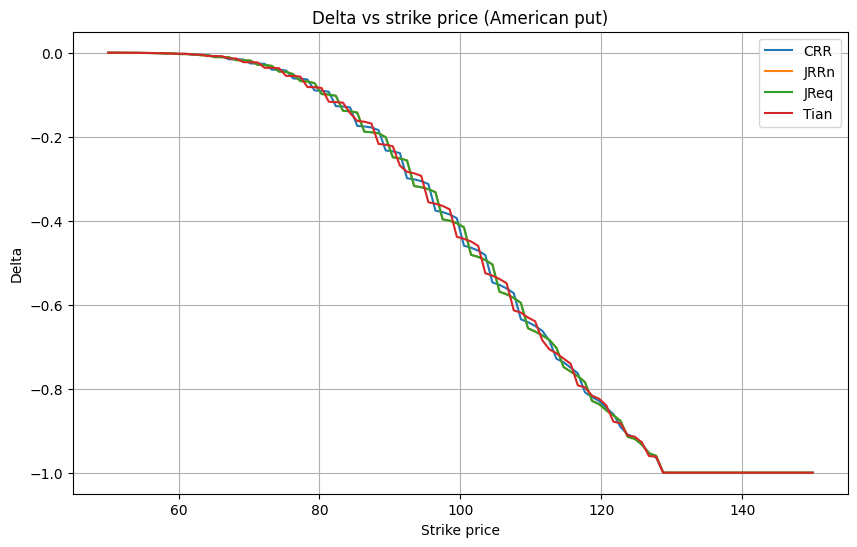

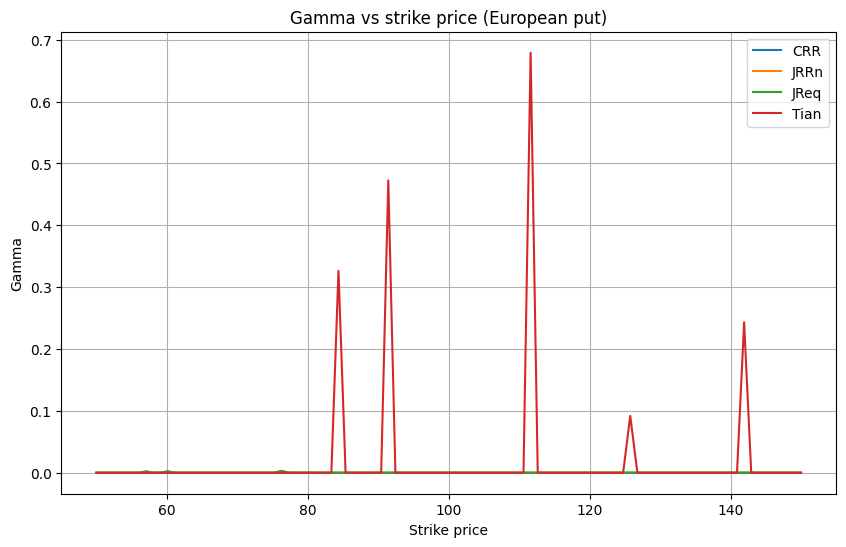

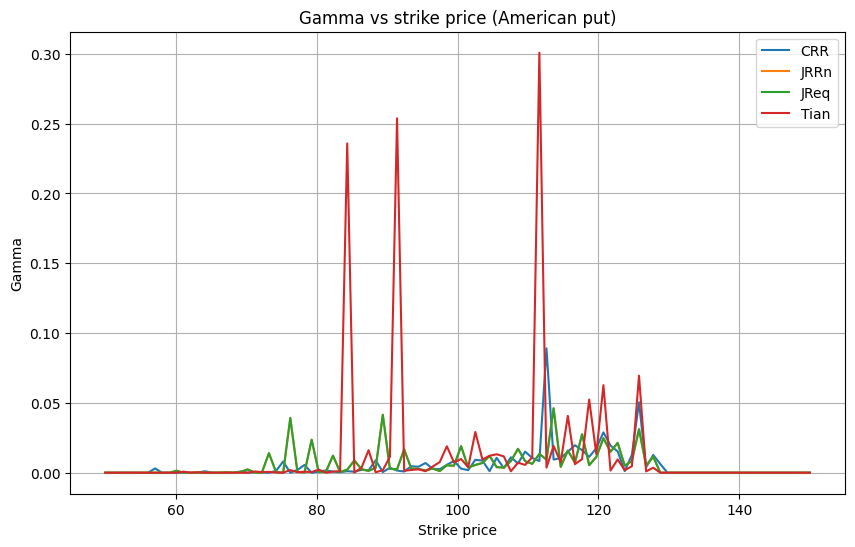

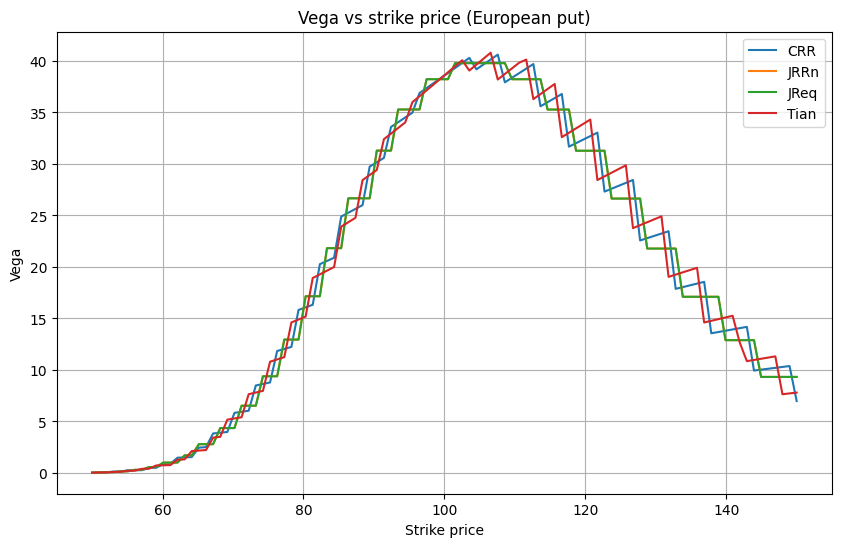

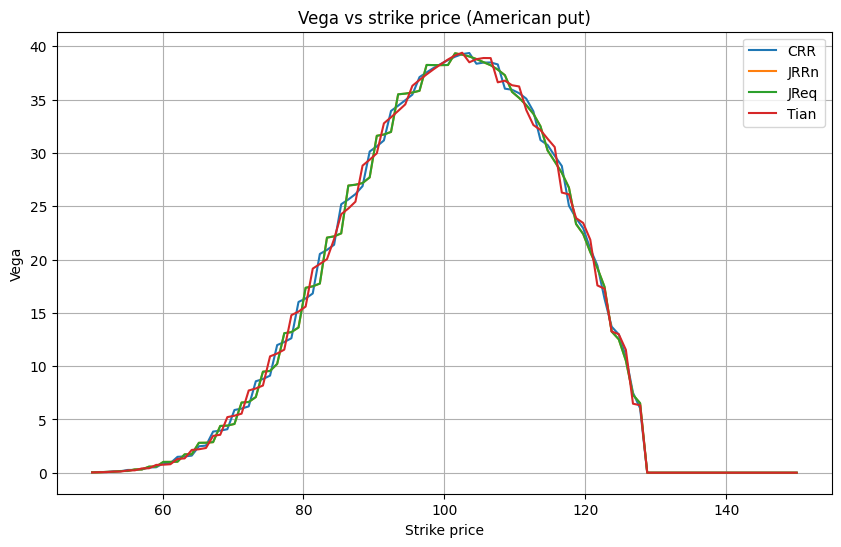

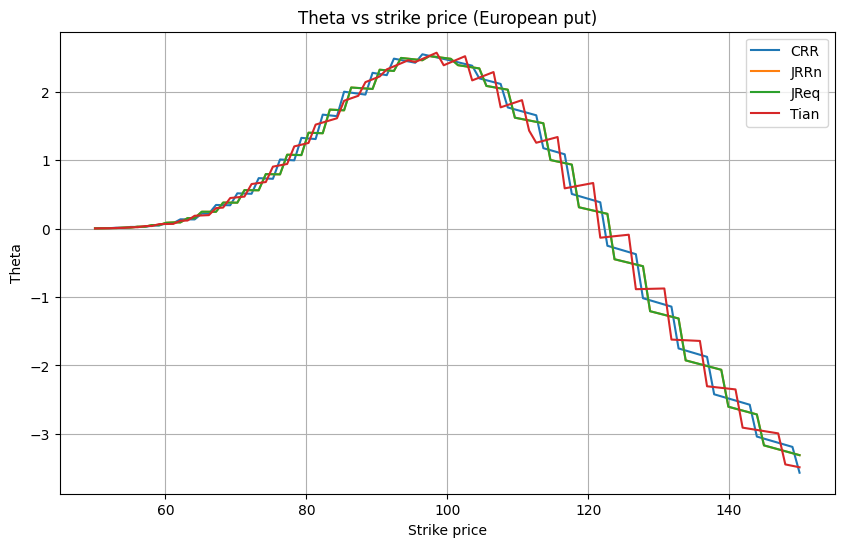

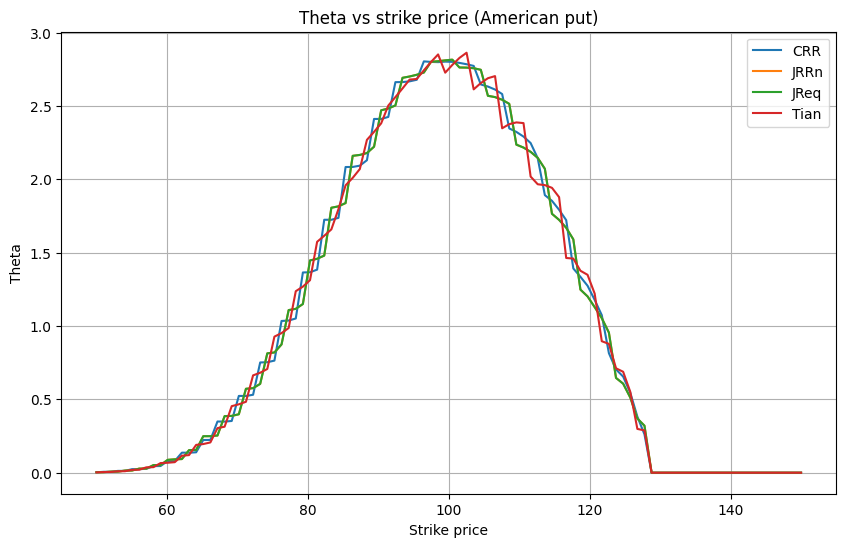

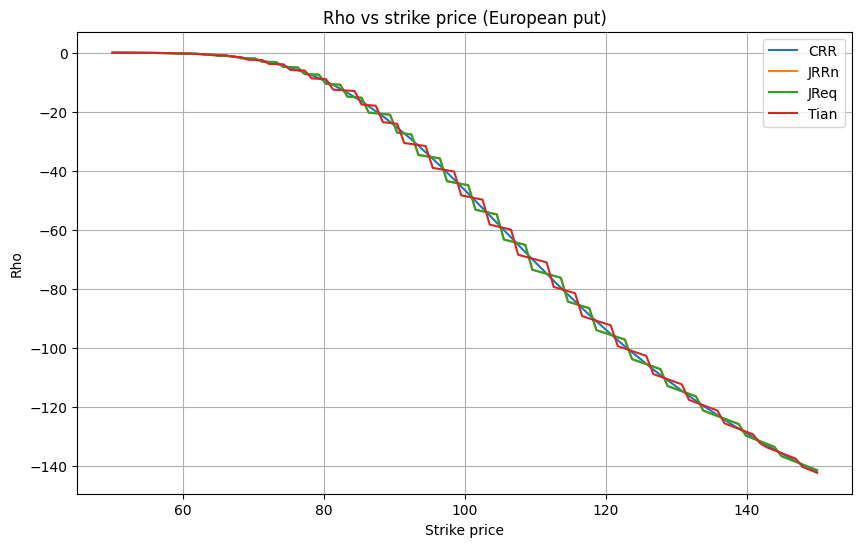

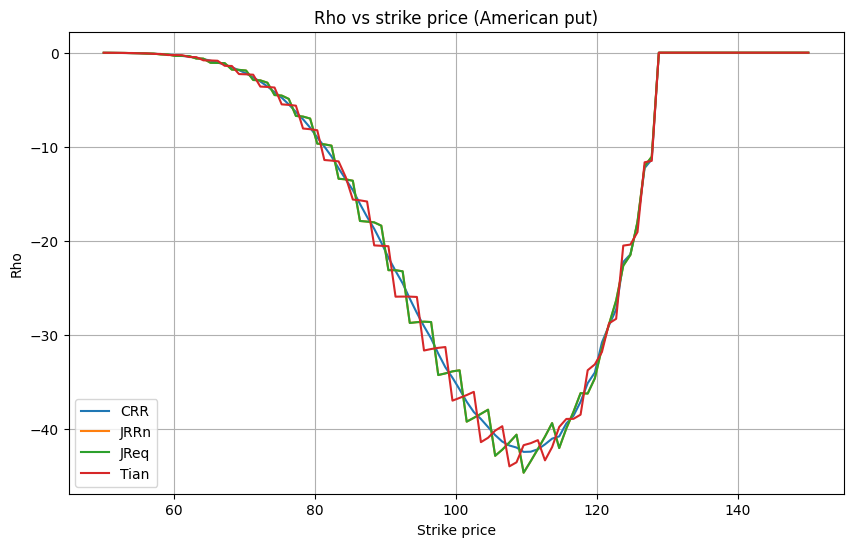

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def binomialGreeks(S, r, vol, T, strike, greekType, optionType, n=100, calib=crrCalib):
    delta_S = 0.001 * S
    delta_vol = 0.001 * vol
    delta_t = 0.004
    delta_r = 0.0001
    
    if optionType == "European":
        option = EuropeanOption(T, strike, PayoffType.Put)
    else:
        option = AmericanOption(T, strike, PayoffType.Put)
    
    base_price = binomialPricer(S, r, vol, option, n, calib)
    
    if greekType == "Price":
        return base_price
    elif greekType == "Delta":
        price_up = binomialPricer(S + delta_S, r, vol, option, n, calib)
        price_down = binomialPricer(S - delta_S, r, vol, option, n, calib)
        return (price_up - price_down) / (2 * delta_S)
    elif greekType == "Gamma":
        price_up = binomialPricer(S + delta_S, r, vol, option, n, calib)
        price_down = binomialPricer(S - delta_S, r, vol, option, n, calib)
        return (price_up - 2 * base_price + price_down) / (delta_S ** 2)
    elif greekType == "Vega":
        price_up = binomialPricer(S, r, vol + delta_vol, option, n, calib)
        price_down = binomialPricer(S, r, vol - delta_vol, option, n, calib)
        return (price_up - price_down) / (2 * delta_vol)
    elif greekType == "Theta":
        new_expiry = T - delta_t
        if optionType == "European":
            new_option = EuropeanOption(new_expiry, strike, PayoffType.Put)
        else:
            new_option = AmericanOption(new_expiry, strike, PayoffType.Put)
        price_new = binomialPricer(S, r, vol, new_option, n, calib)
        return (base_price - price_new) / delta_t
    elif greekType == "Rho":
        price_up = binomialPricer(S, r + delta_r, vol, option, n, calib)
        price_down = binomialPricer(S, r - delta_r, vol, option, n, calib)
        return (price_up - price_down) / (2 * delta_r)
    else:
        raise ValueError("Invalid Greek type")

# Parameters
S = 100
r = 0.03
vol = 0.2
T = 1
strikes = np.linspace(50, 150, 100)
greek_types = ["Price", "Delta", "Gamma", "Vega", "Theta", "Rho"]
option_types = ["European", "American"]
calibrations = [
    ('CRR', crrCalib),
    ('JRRn', jrrnCalib),
    ('JReq', jreqCalib),
    ('Tian', tianCalib)
]

# Plotting
for greek in greek_types:
    for option in option_types:
        plt.figure(figsize=(10, 6))
        for calib_name, calib_func in calibrations:
            values = [binomialGreeks(S, r, vol, T, K, greek, option, calib=calib_func) for K in strikes]
            plt.plot(strikes, values, label=calib_name)
        plt.title(f"{greek} vs strike price ({option} put)")
        plt.xlabel("Strike price")
        plt.ylabel(greek)
        plt.legend()
        plt.grid()
        plt.show()